In [414]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [415]:
#conda install -c conda-forge scikit-plot

In [416]:
#!pip install yfinance
#!pip install investpy
#!pip install pykrx
#!pip install seaborn
#!pip install workalendar
#!pip install --upgrade finance-datareader
#!pip install TA_Lib-0.4.19-cp38-cp38-win_amd64.whl
#!pip install -U finance-datareader
#!pip install keras

In [417]:
#!pip install TA_Lib-0.4.19-cp38-cp38-win_amd64.whl

In [418]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import talib as ta # 기술적 분석 (보조지표)
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
%matplotlib inline

In [576]:
# 크롤링 start_date, end_date
start_date=input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
end_date=input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')
train_date =input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')

YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : 2009-01-01
YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : 2021-01-31
YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : 2019-12-31


In [577]:
# 데이터 수집기간 입력
# yahoo finance 양식, ex) yyyy-mm-dd
#start_date = '2018-01-01'
#end_date = '2020-10-13'

# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]

In [578]:
# 주요 3개국 대비 원 환율

# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# NASDAQ
nasdaq_ = yf.download("^IXIC", start=start_date, end=end_date)
nasdaq_.columns = ['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Close','nasdaq_Adj Close','nasdaq_Volume']
nasdaq_ = nasdaq_.drop(['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Adj Close','nasdaq_Volume'], axis=1)

# Russell 2000
russell_2000_ = yf.download("^RUT", start=start_date, end=end_date)
russell_2000_.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000_ = russell_2000_.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# 삼성 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung = sam_.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd, macdsignal9, macdhist = ta.MACD(model_samsung.Close, fastperiod=12, slowperiod=26, signalperiod=9)
model_samsung['macd'] = macd
model_samsung['macdsignal9'] = macdsignal9
model_samsung['macdhist'] = macdhist

# 2) 볼린저밴드 (주가의 이동평균선을 중심으로 표준편차 범위를 표시)
ubb, mbb, lbb = ta.BBANDS(model_samsung.Close, 20, 2)
model_samsung['ubb'] = ubb
model_samsung['mbb'] = mbb
model_samsung['lbb'] = lbb

# 1) 이평선(SMA, EMA, WMA) (w = 5,10,15,20,30,60,120)
model_samsung['ma_5'] = ta.SMA(model_samsung.Close, timeperiod=5)
model_samsung['ma_10'] = ta.SMA(model_samsung.Close, timeperiod=10)
model_samsung['ma_15'] = ta.SMA(model_samsung.Close, timeperiod=15)
model_samsung['ma_20'] = ta.SMA(model_samsung.Close, timeperiod=20)
model_samsung['ma_30'] = ta.SMA(model_samsung.Close, timeperiod=30)
model_samsung['ma_60'] = ta.SMA(model_samsung.Close, timeperiod=60)
model_samsung['ma_120'] = ta.SMA(model_samsung.Close, timeperiod=120)

MSCI_KR = fdr.DataReader('156080', start_date,end_date) #MSCI KOREA
MSCI_KR = MSCI_KR.drop(['Open','High','Low', 'Change','Volume'], axis=1) 
MSCI_KR.columns = ['MSCI_KR']

# SOX 지수
SOX = yf.download("^SOX", start=start_date, end=end_date)
SOX.columns = ['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Close','SOXX_Adj Close','SOXX_Volume']
SOX = SOX.drop(['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Adj Close','SOXX_Volume'], axis=1)

# 미국 국채 수익률 (5년)
treasury_5y_ = yf.download("^FVX", start=start_date, end=end_date)
treasury_5y_.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y_ = treasury_5y_.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [579]:
model_samsung['exchange_rate_usd'] = exchange_rate_usd_
model_samsung['nasdaq'] = nasdaq_
model_samsung['russell_2000'] = russell_2000_
model_samsung['MSCI_KR'] = MSCI_KR
model_samsung['SOX'] = SOX
model_samsung['treasury_5y'] = treasury_5y_

In [580]:
# samsung 모델
model_samsung['Labeling'] = model_samsung['Close'].shift(-1)
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거
model_samsung

,Open,High,Low,Close,Volume,macd,macdsignal9,macdhist,ubb,mbb,...,ma_30,ma_60,ma_120,exchange_rate_usd,nasdaq,russell_2000,MSCI_KR,SOX,treasury_5y,Labeling
날짜,,,,,,,,,,,,,,,,,,,,,
2012-04-30,27900,28180,27540,27800,315924,514.972445,386.143049,128.829397,27568.172985,26146.0,...,25918.000000,24566.000000,22634.000000,1130.15,3046.360107,816.880005,10609.0,413.390015,0.811,28200.0
2012-05-02,28200,28360,27980,28200,368585,619.193325,432.753104,186.440222,27933.771899,26257.0,...,26018.000000,24680.666667,22707.333333,1130.20,3059.850098,818.599976,10718.0,416.809998,0.819,28020.0
2012-05-03,28040,28200,27960,28020,206721,679.432553,482.088994,197.343559,28160.532041,26323.0,...,26107.333333,24789.666667,22776.666667,1131.25,3024.300049,806.590027,10655.0,406.489990,0.817,27200.0
2012-05-04,27499,27960,26980,27200,410013,653.472602,516.365715,137.106887,28239.902768,26363.0,...,26186.000000,24878.666667,22847.500000,1135.85,2956.340088,791.840027,10578.0,397.940002,0.784,26840.0
2012-05-07,26840,27060,26500,26840,378463,596.968679,532.486308,64.482371,28260.857895,26375.0,...,26242.000000,24962.000000,22907.333333,1138.50,2957.760010,793.809998,10377.0,396.920013,0.782,26820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,90000,96800,89500,91000,90306177,4877.198339,3842.490073,1034.708266,89159.064709,78040.0,...,75356.666667,68418.333333,62972.500000,1097.23,13036.429688,2091.010010,21055.0,2969.919922,0.498,90600.0
2021-01-12,90300,91400,87800,90600,48682416,5175.725651,4109.137188,1066.588463,91039.763720,78925.0,...,76110.000000,68928.333333,63279.166667,1094.48,13072.429688,2127.959961,20870.0,2988.020020,0.503,89700.0
2021-01-13,89800,91200,89100,89700,36068848,5278.837071,4343.077165,935.759906,92437.464314,79740.0,...,76826.666667,69431.666667,63573.333333,1097.12,13128.950195,2111.969971,21075.0,2991.949951,0.476,89700.0


In [581]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

In [582]:
#4 test, train 나누기
df_scaled = model_samsung.copy()
df_scaled.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)
train_set = df_scaled[:train_date].values

print(df_scaled.shape)
print(train_set.shape)
#print(test_set.shape)

(2060, 21)
(1811, 21)


In [583]:
train_set.shape[1]

21

In [590]:
time_seq = 3
X_train = []
y_train = []
for i in range(time_seq, train_set.shape[0]):
    X_train.append(train_set[i-time_seq:i, 0:train_set.shape[1]-1])
    y_train.append(train_set[i, train_set.shape[1]-1:])
X_train, y_train = np.array(X_train), np.array(y_train)

In [591]:
scalers = {}
#sc2 = StandardScaler()
sc2 = MinMaxScaler()
for i in range(X_train.shape[1]):
    scalers[i] = MinMaxScaler()
    X_train[:, i, :] = scalers[i].fit_transform(X_train[:, i, :]) 
    
y_train = sc2.fit_transform(y_train)

In [592]:
print(X_train.shape)
print(y_train.shape)

(1808, 3, 20)
(1808, 1)


In [593]:
X_test = []
y_test = []
for i in range(train_set.shape[0], df_scaled.shape[0]):
    X_test.append(df_scaled.values[i-time_seq:i, 0:train_set.shape[1]-1])
    y_test.append(df_scaled.values[i, train_set.shape[1]-1:])
X_test, y_test = np.array(X_test), np.array(y_test)

for i in range(X_test.shape[1]):
    X_test[:, i, :] = scalers[i].transform(X_test[:, i, :]) 

y_test = sc2.transform(y_test)

In [594]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [595]:
#7 딥러닝에 적용하기
from keras.callbacks import EarlyStopping
# LSTM 모델 만들기
model = Sequential()
# LSTM 레이어를 쌓아올릴 때는 return_sequences 를 True로 설정한다
# LSTM 을 사용하기 위해서는 3차원 데이터가 필요(batch_size, timesteps, input_dim)
model.add(LSTM(60, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(30, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
es = EarlyStopping(monitor='val_loss', mode='min', patience=200, verbose=1)
history = model.fit(X_train, y_train, batch_size=50, epochs=300, validation_data=(X_test, y_test), verbose=0, callbacks=[es]) #verbose=0, callbacks=[es])

Epoch 00278: early stopping


In [596]:
def drawLossChart(history):
    from matplotlib import pyplot
    # evaluate the model
    train_loss = model.evaluate(X_train, y_train, verbose=0)
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_loss, test_loss))
    # plot training history
    pyplot.plot(history.history['loss'], c="blue",label='train')
    pyplot.plot(history.history['val_loss'], c="red", label='test')
    pyplot.legend(loc='upper right')
    pyplot.grid()
    pyplot.xlabel('epoch')
    pyplot.ylabel('loss')
    pyplot.show()

Train: 0.001, Test: 0.009


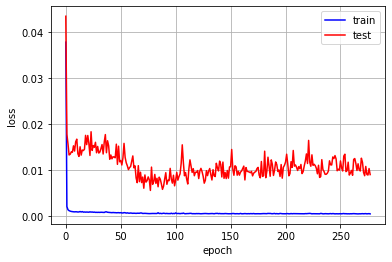

In [597]:
#과적합 예방을 위해서는 epoch 3 정도에서 멈춘 모델을 사용하는 것이 좋을 것 같다
drawLossChart(history)

In [598]:
predictions = model.predict(X_test)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.09512424171573988

In [599]:
# train set의 평균을 예측값으로 했을 때의 오차
mu = y_train.mean()
np.sqrt(np.mean((y_test - mu) ** 2))

0.7066663294011718

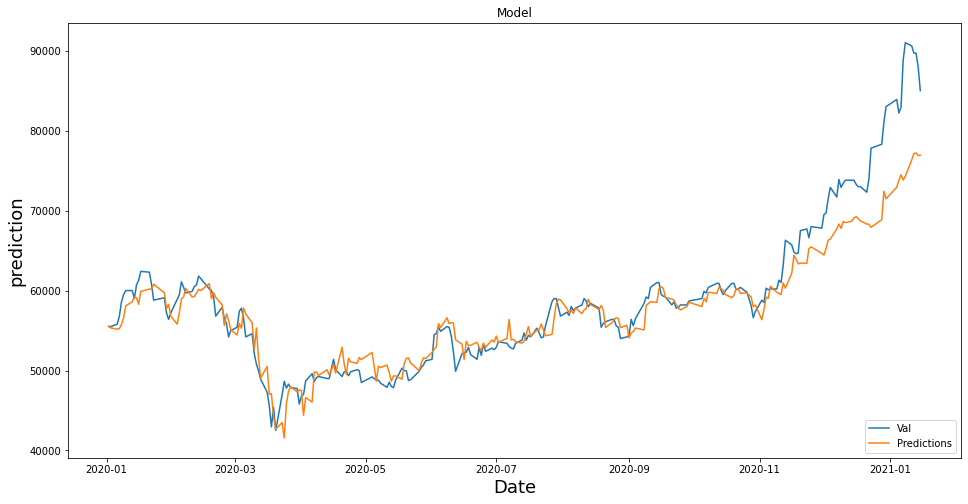

In [600]:
# 그래프로 확인
train = df_scaled[:train_date][['Labeling']]
valid = df_scaled[train_date:][['Labeling']]
valid['Predictions'] = sc2.inverse_transform(predictions)

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('prediction', fontsize=18)
#plt.plot(train)
plt.plot(valid['Labeling'])
plt.plot(valid['Predictions'])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

In [601]:
import datetime
date_1 = pd.to_datetime(train_date)
view_date = date_1 + datetime.timedelta(days=30)
view_date = str(view_date)
view_date = view_date[:10]
view_date

'2020-01-30'

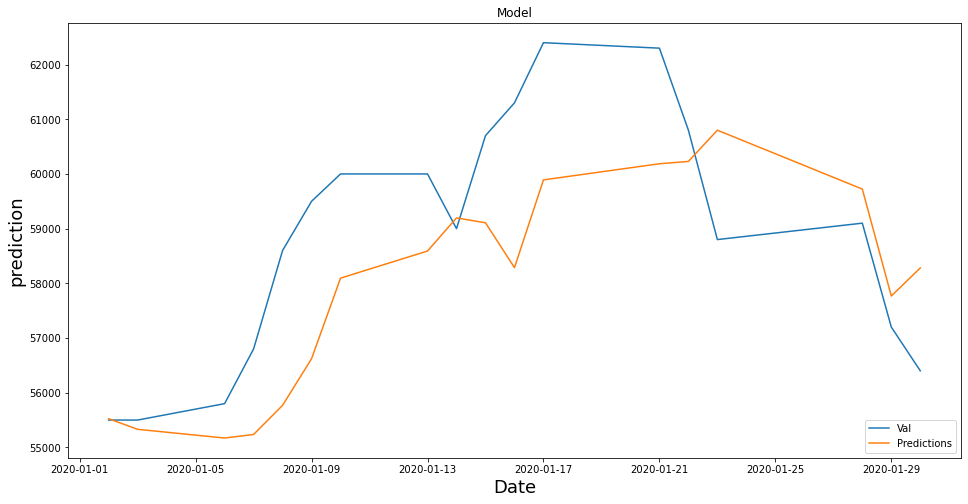

In [602]:
# 일부분 확대
valid = df_scaled[train_date:][['Labeling']]
valid['Predictions'] = sc2.inverse_transform(predictions)

valid = valid[train_date:view_date]

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('prediction', fontsize=18)
#plt.plot(train)
plt.plot(valid['Labeling'])
plt.plot(valid['Predictions'])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()